# Deep Value-based Reinforcement Learning

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/refs/heads/main/assets/logo.jpg?raw=true" style="float: left; width: 15%" />

[CSC_53439_EP-2025](https://moodle.ip-paris.fr/course/view.php?id=10716) Lab session #1

2019-2025 Jérémie Decock

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jeremiedecock/polytechnique-csc-53439-ep-2025-students/blob/main/lab1_deep_value-based_reinforcement_learning.ipynb)

[![My Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main?filepath=lab1_deep_value-based_reinforcement_learning.ipynb)

[![NbViewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/jeremiedecock/polytechnique-csc-53439-ep-2025-students/blob/main/lab1_deep_value-based_reinforcement_learning.ipynb)

[![Local](https://img.shields.io/badge/Local-Save%20As...-blue)](https://github.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/raw/main/lab1_deep_value-based_reinforcement_learning.ipynb)

## Introduction

The aim of this lab is to provide an in-depth exploration of the most renowned value-based reinforcement learning techniques, specifically *Deep Q-Networks* and its enhancements.

In this Python notebook, you will implement and evaluate *Deep Q-Networks* (DQN) and its various adaptations.

You can either:
- open, edit and execute the notebook in *Google Colab* following this link: https://colab.research.google.com/github/jeremiedecock/polytechnique-csc-53439-ep-2025-students/blob/main/lab1_deep_value-based_reinforcement_learning.ipynb ; this is the **recommended** choice as you have nothing to install on your computer
- open, edit and execute the notebook in *MyBinder* (if for any reason the Google Colab solution doesn't work): https://mybinder.org/v2/gh/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main?filepath=lab1_deep_value-based_reinforcement_learning.ipynb
- download, edit and execute the notebook on your computer if Python3 and JypyterLab are already installed: https://github.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/raw/main/lab1_deep_value-based_reinforcement_learning.ipynb

If you work with Google Colab or MyBinder, **remember to save or download your work regularly or you may lose it!**

### Survey

Please answer the following survey to help us improve this lab session: https://moodle.ip-paris.fr/mod/questionnaire/view.php?id=185677

## Lab Submission

Please submit your completed notebook in [Moodle : "Lab 1 - Submission"](https://moodle.ip-paris.fr/mod/assign/view.php?id=185679).

### Submission Guidelines

1. **File Naming:** Rename your notebook as follows: **`firstname_lastname-01.ipynb`** where `firstname` and `lastname` match your email address. *Example: `jesse_read-01.ipynb`*
2. **Clear Output Cells:** To reduce file size (**must be under 500 KB**), clear all output cells before submitting. This includes rendered images, videos, plots, and dataframes...
   - **JupyterLab:**
     - Click **"Kernel" → "Restart Kernel and Clear Outputs of All Cells..."**
     - Then go to **"File" → "Save Notebook As..."**
   - **Google Colab:**
     - Click **"Edit" → "Clear all outputs"**
     - Then go to **"File" → "Download" → "Download.ipynb"**
   - **VSCode:**
     - Click **"Clear All Outputs"**
     - Then **save your file**
3. **Upload Your File:** Only **`.ipynb`** files are accepted.

**Note:** Bonus parts (if any) are optional, as their name suggests.


### Deep value-based reinforcement learning

Deep reinforcement learning methods like DQN (Deep Q-Networks) are significant advancements over tabular methods such as Q-Learning because they can handle complex, high-dimensional environments that were previously intractable. While Q-Learning is limited to environments where the state and action spaces are sufficiently small to maintain a table of values, DQN uses neural networks to approximate the Q-value function, allowing it to generalize across similar states and scale to problems with vast state spaces. This enables DQN to learn optimal policies for tasks like video games, robotic control, and other applications where the number of possible states is extraordinarily large.

While DQN was designed to tackle large environments like Atari games, the primary focus of this lab is to delve into the underlying algorithms, understand them thoroughly, and evaluate them comprehensively. It's important to note that working with not-so-deep networks captures the essence of deep reinforcement learning, excluding the computational expense. The transition from tabular Q-learning to DQN involves significant implications, primarily due to the ability of DQN to handle high-dimensional state spaces. Moving from DQN to very-deep-DQN is primarily a matter of scale and computational resources. The core principles remain the same, and understanding these principles is the key to mastering reinforcement learning, regardless of the complexity of the network used.
For these reasons, in this lab, we will focus on studying the CartPole environment. The CartPole problem is a classic in reinforcement learning, and it provides a simpler and more manageable context for understanding the principles of DQN. The convergence in the CartPole environment is much faster than in Atari games - typically within a minute, as opposed to approximately hours on a well-equipped personal computer for Atari games. This allows us to experiment and iterate more quickly, facilitating a deeper understanding of the algorithms at play.

We will therefore focus on algorithms in a simple environment.

## Setup the Python environment

This notebook relies on several libraries including `gymnasium[classic-control]`, `ipywidgets`, `matplotlib`, `numpy`, `pandas`, `pygame`, `seaborn`, `torch`, and `tqdm`.
A complete list of dependencies can be found in the following [requirements_lab1.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/requirements_lab1.txt) file.

### If you use Google Colab

If you use Google Colab, execute the next cell to install required libraries.

In [1]:
import sys
import subprocess

def is_colab():
    return "google.colab" in sys.modules

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

if is_colab():
    # run_subprocess_command("apt install xvfb x11-utils")
    run_subprocess_command("pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/requirements_lab1_google_colab.txt")

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.4 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 54.7 MB/s eta 0:00:00
Preparing metadata (setup.py): started
Preparing metadata (setup.py): finished with status 'done'
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.0 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 98.9 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.3 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.7 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 96.7 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 28.6 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.6 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 96.0 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.3 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.9 MB/s eta 0:0

### If you have downloaded the notebook on your computer and execute it in your own Python environment

To set up the necessary dependencies, run the following commands to establish a [Python virtual environment (venv)](https://docs.python.org/3/library/venv.html) that includes all the essential libraries for this lab.

#### On Posix systems (Linux, MacOSX, WSL, ...)

```bash
python3 -m venv env-lab1
source env-lab1/bin/activate
python3 -m pip install --upgrade pip
python3 -m pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/requirements_lab1.txt
```

#### On Windows

```bash
python3 -m venv env-lab1
env-lab1\Scripts\activate.bat
python3 -m pip install --upgrade pip
python3 -m pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/requirements_lab1.txt
```

### Run CSC-53439-EP notebooks locally in a dedicated Docker container

If you are familiar with Docker, an image is available on Docker Hub for this lab:

```bash
docker run -it --rm --user root -p 8888:8888 -e NB_UID=$(id -u) -e NB_GID=$(id -g) -v "${PWD}":/home/jovyan/work jdhp/csc-53439-ep-lab1:latest
```

### Import required packages

In [2]:
import collections
import gymnasium as gym
import itertools
import numpy as np
from numpy.typing import NDArray
import pandas as pd
from pathlib import Path
import random
import time
import torch
from torch.optim.lr_scheduler import _LRScheduler
from typing import List, Tuple, Deque, Optional, Callable

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
from tqdm.notebook import tqdm

In [4]:
gym.__version__

'1.2.1'

In [5]:
sns.set_context("talk")

In [6]:
FIGS_DIR = Path("figs/") / "lab1"       # Where to save figures (.gif or .mp4 files)
PLOTS_DIR = Path("figs/") / "lab1"      # Where to save plots (.png or .svg files)
MODELS_DIR = Path("models/") / "lab1"   # Where to save models (.pth files)

In [7]:
if not FIGS_DIR.exists():
    FIGS_DIR.mkdir(parents=True)
if not PLOTS_DIR.exists():
    PLOTS_DIR.mkdir(parents=True)
if not MODELS_DIR.exists():
    MODELS_DIR.mkdir(parents=True)

### Create a Gymnasium rendering wrapper to visualize environments as GIF images within the notebook

This notebook allows you to visualize the episodes as animated GIFs. Run the cell below to enable this feature.

In [8]:
# To display GIF images in the notebook

import imageio     # To render episodes in GIF images (otherwise there would be no render on Google Colab)
                   # C.f. https://stable-baselines.readthedocs.io/en/master/guide/examples.html#bonus-make-a-gif-of-a-trained-agent
import IPython
from IPython.display import Image

if is_colab():
    import pyvirtualdisplay

    _display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                        size=(1400, 900))
    _ = _display.start()

class RenderWrapper:
    def __init__(self, env, force_gif=False):
        self.env = env
        self.force_gif = force_gif
        self.reset()

    def reset(self):
        self.images = []

    def render(self):
        if not is_colab():
            self.env.render()
            time.sleep(1./60.)

        if is_colab() or self.force_gif:
            img = self.env.render()         # Assumes env.render_mode == 'rgb_array'
            self.images.append(img)

    def make_gif(self, filename="render"):
        if is_colab() or self.force_gif:
            gif_path = filename.with_suffix('.gif')
            imageio.mimsave(gif_path, [np.array(img) for i, img in enumerate(self.images) if i%2 == 0], fps=29, loop=0)
            return Image(open(gif_path,'rb').read())

    @classmethod
    def register(cls, env, force_gif=False):
        env.render_wrapper = cls(env, force_gif=True)

## Define some parameters

### Number of trainings

To achieve more representative outcomes at the conclusion of each exercise, we average the results across multiple training sessions. The `DEFAULT_NUMBER_OF_TRAININGS` variable specifies the number of training sessions conducted before the results are displayed.

We recommend setting a lower value (such as 1 or 2) during the development and testing phases of your implementations. Once you have completed your work and are confident in its functionality, you can increase the number of training sessions to minimize the variance in results. Be aware that a higher number of training sessions will extend the execution time, so adjust this setting in accordance with your computer's capabilities.

Additionally, you have the option to assign a specific value to the `NUMBER_OF_TRAININGS` variable for each exercise directly within the cells where the training loop is defined (the `NUMBER_OF_TRAININGS` variable is commented out at the beginning of these cells).

In [32]:
DEFAULT_NUMBER_OF_TRAININGS = 3

## PyTorch Refresher and Cheat Sheet

In this lab, we will be implementing our deep reinforcement learning algorithms using PyTorch.
If you need a refresher, you might find this [PyTorch Cheat Sheet](https://web.archive.org/web/20241215022731/https://pytorch.org/tutorials/beginner/ptcheat.html) helpful. It provides a quick reference for many of the most commonly used PyTorch functions and concepts, and can be a valuable resource as you work through this lab.

You can also refer to the [official documentation](https://pytorch.org/docs/stable/index.html).

## PyTorch setup

PyTorch can run on both CPUs and GPUs. The following cell will determine the device PyTorch will use. If a GPU is available, PyTorch will use it; otherwise, it will use the CPU.

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set the device to CUDA if available, otherwise use CPU

For utilizing a GPU on Google Colab, you also have to activate it following the steps outlined [here](https://colab.research.google.com/notebooks/gpu.ipynb).

In [11]:
print("Available GPUs:")
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"- Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("- No GPU available.")

Available GPUs:
- No GPU available.


If you have a very recent GPU and want to use it, you might need to install a specific version of PyTorch compatible with your Cuda version. For this, you will have to edit the [requirements-lab1.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/requirements_lab1.txt) file and replace the current version of PyTorch with the one compatible with your Cuda version. Check the [official PyTorch website](https://pytorch.org/get-started/locally/) for more information.

Note that the GPU is not very useful in this lab because CartPole is a simple and quick problem to solve, and CUDA spends more time transferring data between the CPU and GPU than processing it directly on the CPU.

You can uncomment the next cell to explicitly instruct PyTorch to train neural networks using the CPU.

In [12]:
# device = "cpu"

In [13]:
print(f"PyTorch will train and test neural networks on {device}")

PyTorch will train and test neural networks on cpu


## Bonus section 1: Monitoring the training process with Tensorboard and Aim

Monitoring the training process is crucial for understanding the agent's learning progress. In this section, we will introduce two open-source tools that can help you visualize the training process: Tensorboard and Aim.

Tensorflow and Aim are particularly useful for monitoring the training process on a local machine, as they do not require a server to run.
Other solutions will be covered in the next tutorials.

### Monitoring the training process with Tensorboard

TensorBoard is a visualization tool developed by Google, primarily used to track and visualize metrics during the training of deep learning models. While initially designed for TensorFlow, it can also be integrated with **PyTorch** through the **torch.utils.tensorboard** API. This allows real-time tracking of metrics such as losses, accuracy, computation graphs, and even examining images, weight distributions, histograms, and more.

The following cell demonstrates how to use TensorBoard with PyTorch.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

# Simple example: model and data
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# Creating a model, optimizer, and loss function
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Initializing TensorBoard SummaryWriter
writer = SummaryWriter()

# Training example
for epoch in range(100):
    # Fake data
    inputs = torch.randn(32, 10)
    targets = torch.randn(32, 1)

    # Forward pass
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss values to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)

# Closing SummaryWriter
writer.close()

KeyboardInterrupt: 

**`SummaryWriter`** is the central tool for logging data to TensorBoard. It captures metric values, like loss, for each iteration/epoch.

This example trains a simple model on fake data (32 samples with 10 features) over 100 epochs, and at each epoch, the loss value is sent to TensorBoard via `writer.add_scalar`.

To visualize the data from a local machine, run the following command in the terminal:

```bash
tensorboard --logdir=runs
```

then open a web browser and go at the address mentioned in the terminal (usually http://localhost:6006/).

If you are using Google Colab, you can use the **TensorBoard magic** to visualize the data directly in the notebook.

In [ ]:
# Load TensorBoard extension in Colab
%load_ext tensorboard
%tensorboard --logdir ./runs

For mor information, check the Official Documentation:
- [TensorBoard for PyTorch Documentation](https://pytorch.org/docs/stable/tensorboard.html)
- [Official TensorBoard Documentation (General)](https://www.tensorflow.org/tensorboard)

### Monitoring the training process with AIM

Aim is an open-source alternative to TensorBoard for managing and visualizing machine learning experiments.
Designed to be simpler and more flexible, **Aim** allows tracking and analyzing metrics, hyperparameters, model outputs, and more for projects using PyTorch, TensorFlow, or other frameworks.

<img src="https://user-images.githubusercontent.com/13848158/136374529-af267918-5dc6-4a4e-8ed2-f6333a332f96.gif" width="600px"></img>

The following cell demonstrates how to use Aim with PyTorch.

In [ ]:
import torch
import aim

# Initialize Aim
run = aim.Run()

# set training hyperparameters
run['hparams'] = {
    'learning_rate': 0.01,
    'batch_size': 32,
}

# Simple model example
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    inputs = torch.randn(10, 1)
    targets = torch.randn(10, 1)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track the 'loss' metric
    run.track(loss.item(), name='loss', epoch=epoch)    # Log metric with Aim

This example trains a simple model on fake data over 10 epochs, and at each epoch, the loss value is sent to Aim via `run.track`.

To visualize the data from a local machine, run the following command in the terminal:

```bash
aim up
```

then open a web browser and go at the address mentioned in the terminal (usually http://localhost:43800/).

Or alternatively, you can use the **Aim magic** to [visualize the data directly in the notebook](https://aimstack.readthedocs.io/en/latest/using/jupyter_notebook_ui.html) (for instance if you are using Google Colab).

In [ ]:
%load_ext aim
%aim up

For more information, check the official Documentation:
- [Aim Documentation](https://aimstack.readthedocs.io/en/latest/)
- [GitHub Aim](https://github.com/aimhubio/aim)
- [Quick start](https://github.com/aimhubio/aim#-quick-start)
- [Getting started](https://aimstack.readthedocs.io/en/latest/quick_start/setup.html)

## Part 1: Hands on Cart Pole environment [reminder]

For the purpose of focusing on the algorithms, we will use standard environments provided by the Gymnasium suite.
Gymnasium provides controllable environments (https://gymnasium.farama.org/environments/classic_control/) for research in reinforcement learning.
Especially, we will try to solve the CartPole-v1 environment (c.f. https://gymnasium.farama.org/environments/classic_control/cart_pole/) which offers a continuous state space and discrete action space.
The Cart Pole task consists in maintaining a pole in a vertical position by moving a cart on which the pole is attached with a joint.
No friction is considered.
The task is supposed to be solved if the pole stays up-right (within 15 degrees) for 200 steps in average over 100 episodes while keeping the cart position within reasonable bounds.
The state is given by $\{x,\frac{d x}{d t},\omega,\frac{d \omega}{d t}\}$ where $x$ is the position of the cart and $\omega$ is the angle between the pole and vertical position.
There are only two possible actions: $a \in \{0, 1\}$ where $a = 0$ means "push the cart to the LEFT" and $a = 1$ means "push the cart to the RIGHT".

### Exercise 1: Hands on Cart Pole

**Task 1:** refer to the following link [CartPole Environment](https://gymnasium.farama.org/environments/classic_control/cart_pole/) to familiarize yourself with the CartPole environment if you are not already.

**Note:** for a refresher on the key concepts of Gymnasium, you can visit this [Basic Usage Guide](https://gymnasium.farama.org/introduction/basic_usage/).

Print some information about the environment:

In [17]:
env = gym.make('CartPole-v1', render_mode="rgb_array")

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n.item()

print(f"State space size is: { env.observation_space }")
print(f"Action space size is: { env.action_space }")
print("Actions are: {" + ", ".join([str(a) for a in range(env.action_space.n)]) + "}")

env.close()

State space size is: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space size is: Discrete(2)
Actions are: {0, 1}


**Task 2:** Run the following cells and check different basic
policies (for instance constant actions or randomly drawn actions) to discover the CartPole environment.
Although this environment has easy dynamics that can be computed analytically, we will solve this problem with Policy Gradient based Reinforcement learning.

### Test the CartPole environment with a constant policy

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[-0.00409462  0.03947833 -0.01922821  0.00341554]
[-0.00330505 -0.15536267 -0.0191599   0.28997025]
[-0.0064123  -0.35020623 -0.0133605   0.5765493 ]
[-0.01341643 -0.54513836 -0.00182951  0.8649936 ]
[-0.02431919 -0.7402354   0.01547036  1.1571007 ]
[-0.0391239  -0.9355555   0.03861237  1.454594  ]
[-0.05783501 -1.1311297   0.06770425  1.7590858 ]
[-0.08045761 -1.3269498   0.10288597  2.072033  ]
[-0.1069966  -1.5229554   0.14432663  2.3946817 ]
[-0.13745572 -1.7190173   0.19222026  2.7280016 ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


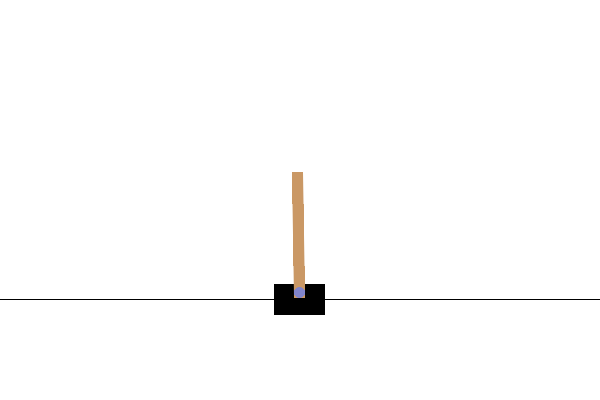

In [17]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

observation, info = env.reset()
done = False

for t in range(50):
    env.render_wrapper.render()

    if not done:
        print(observation)
    else:
        print("x", end="")

    action = 0
    observation, reward, done, truncated, info = env.step(action)


print()
env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_ex1left")

In [ ]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

observation, info = env.reset()
done = False

for t in range(50):
    env.render_wrapper.render()

    if not done:
        print(observation)
    else:
        print("x", end="")

    action = 1
    observation, reward, done, truncated, info = env.step(action)

print()
env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_ex1right")

### Test the CartPole environment with a random policy

In [ ]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

for episode_index in range(5):
    observation, info = env.reset()
    done = False

    for t in range(70):
        env.render_wrapper.render()

        if not done:
            print(observation)
        else:
            print("x", end="")


        action = env.action_space.sample()
        observation, reward, done, truncated, info = env.step(action)

    print()
    env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_ex1random")

## Part 2: Deep value-based reinforcement learning with Deep Q-Networks (DQN) [reminder]

In this part, we will begin our exploration of deep reinforcement learning with Deep Q-Networks (DQN), a famous value-based method.

Deep reinforcement learning methods like DQN (Deep Q-Networks) are significant advancements over tabular methods such as Q-Learning because they can handle complex, high-dimensional environments that were previously intractable. While Q-Learning is limited to environments where the state and action spaces are sufficiently small to maintain a table of values, DQN uses neural networks to approximate the Q-value function, allowing it to generalize across similar states and scale to problems with vast state spaces. This enables DQN to learn optimal policies for tasks like video games, robotic control, and other applications where the number of possible states is extraordinarily large.

### Exercise 2: Implement a naive value-based deep reinforcement learning algorithm

Our first step will be to write a naive implementation of a version of Q-Learning, where the Q-function is approximated by a neural network. This approach combines traditional Q-Learning with the power of function approximation provided by neural networks, allowing us to handle environments with large state spaces.

#### The algorithm

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}}$ $)$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ $y \leftarrow
		\begin{cases}
			r & \text{for terminal } \mathbf{s'}\\
			r + \gamma \max_{\mathbf{a}^\star \in \mathcal{A}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'})_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}
		\end{cases}$<br>
		$\quad\quad$ $\mathbf{\omega} \leftarrow \mathbf{\omega} + \alpha \left[ y - \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}} \right] ~ \nabla_{\mathbf{\omega}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}}$ <br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>

#### Implement the Q-network

The Q-Network is used to approximate the action value function, which gives the expected future reward for taking a particular action in a particular state. The network is trained to minimize the difference between its predicted Q-values and the actual return received.

In this exercise, the Q-Network is implemented as a simple feedforward neural network with two hidden layers. The input to the network consists of the observed state, and the output provides a Q-value for each possible action.  
Each hidden layer applies the ReLU activation function, while the output layer uses a linear activation function.

**Important note:** The "naive" agent you will implement in this exercise is **not** a DQN agent and **will not be able to solve the CartPole environment**. However, it serves as a stepping stone toward implementing the DQN agent in Exercises 3 and 4.

**Task 2.1:** implement the constructor and the `forward` method of the Q-network we will use in our RL agents

In [14]:
class QNetwork(torch.nn.Module):
    """
    A Q-Network implemented with PyTorch.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        First fully connected layer.
    layer2 : torch.nn.Linear
        Second fully connected layer.
    layer3 : torch.nn.Linear
        Third fully connected layer.

    Methods
    -------
    forward(x: torch.Tensor) -> torch.Tensor
        Define the forward pass of the QNetwork.
    """

    def __init__(self, n_observations: int, n_actions: int, nn_l1: int, nn_l2: int):
        """
        Initialize a new instance of QNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        nn_l1 : int
            The number of neurons on the first layer.
        nn_l2 : int
            The number of neurons on the second layer.
        """
        super(QNetwork, self).__init__()

        self.layer1 = torch.nn.Linear(n_observations, nn_l1)
        self.layer2 = torch.nn.Linear(nn_l1, nn_l2)
        self.layer3 = torch.nn.Linear(nn_l2, n_actions)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Define the forward pass of the QNetwork.

        Parameters
        ----------
        x : torch.Tensor
            The input tensor (state).

        Returns
        -------
        torch.Tensor
            The output tensor (Q-values).
        """

        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)

        return x

#### Implement an inference function

##### Parctical tips

To complete task 2.2, you need to be familiar with the following PyTorch concepts:

- [torch.squeeze](https://pytorch.org/docs/stable/generated/torch.squeeze.html) (or [torch.Tensor.squeeze](https://pytorch.org/docs/stable/generated/torch.Tensor.squeeze.html)) / [torch.unsqueeze](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) (or [torch.Tensor.unsqueeze](https://pytorch.org/docs/stable/generated/torch.Tensor.unsqueeze.html)) to add / remove a batch dimension.
- [torch.argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html) (or [torch.Tensor.argmax](https://pytorch.org/docs/stable/generated/torch.Tensor.argmax.html)) to get the index of the maximum value of a tensor.
- [torch.Tensor.item](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html) to get the value of a tensor with a single element as a standard Python number.

**Task 2.2:** Your next assignment is to complete the function below, which will be used to evaluate the performance of an agent in a simulated environment over one or multiple episodes.

In [15]:
def test_q_network_agent(env: gym.Env, q_network: torch.nn.Module, num_episode: int = 1, render: bool = True) -> List[int]:
    """
    Test a naive agent in the given environment using the provided Q-network.

    Parameters
    ----------
    env : gym.Env
        The environment in which to test the agent.
    q_network : torch.nn.Module
        The Q-network to use for decision making.
    num_episode : int, optional
        The number of episodes to run, by default 1.
    render : bool, optional
        Whether to render the environment, by default True.

    Returns
    -------
    List[int]
        A list of rewards per episode.
    """
    episode_reward_list = []

    for episode_id in range(num_episode):

        state, info = env.reset()
        done = False
        episode_reward = 0

        while not done:
            if render:
                env.render_wrapper.render()

            # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

            # q_values = TODO... # Compute the Q-values for the current state using the Q-network
            q_values = q_network(state_tensor)

            # action = TODO... # Select the action with the highest Q-value
            action = torch.argmax(q_values).item()

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += reward

            state = next_state

        episode_reward_list.append(episode_reward)
        print(f"Episode reward: {episode_reward}")

    return episode_reward_list

**Task 2.3:** Test this function on the untrained agent.

In [18]:
q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)

Episode reward: 9.0
Episode reward: 9.0
Episode reward: 11.0
Episode reward: 12.0
Episode reward: 10.0


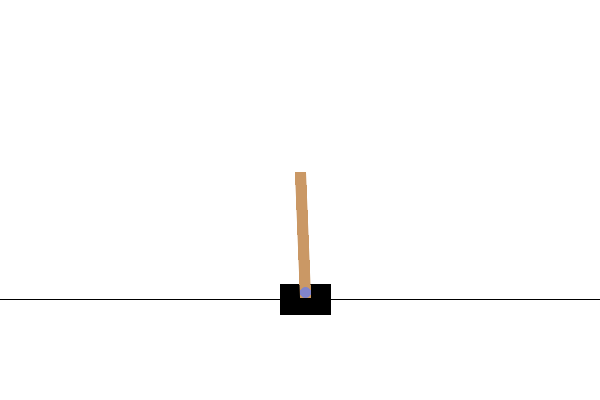

In [20]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=5)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dqn_naive_untained")

#### Implement the epsilon greedy function

In the following cell, you will implement the epsilon-greedy strategy, which is a crucial component in balancing exploration and exploitation during the learning process of our reinforcement learning agent.
In this implementation, the epsilon value will decrease over time to encourage the agent to explore more in the early stages of training and exploit more as training progresses. After a certain number of episodes, the epsilon value will remain constant at a minimum value.

The figure below illustrates the usage of `epsilon`, `epsilon_min` and `epsilon_start`:

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/assets/lab1_epsilon.svg" width="600px" />

**Task 2.4:** Now, let's proceed to implement the epsilon-greedy strategy, which is a crucial component in balancing exploration and exploitation during the learning process of our reinforcement learning agent. To accomplish this, complete the `__call__` function in the following code block.

**Tips:** `EpsilonGreedy` is a *[callable](https://docs.python.org/3/glossary.html#term-callable) class* (a.k.a a Python *functor*) that can be used as a function. The `__call__` method is called when the instance is "called" as a function. In this case, the `__call__` method should return a random action with probability `epsilon` and the action with the highest Q-value with probability `1 - epsilon`.

In [21]:
class EpsilonGreedy:
    """
    An Epsilon-Greedy policy.

    Attributes
    ----------
    epsilon : float
        The initial probability of choosing a random action.
    epsilon_min : float
        The minimum probability of choosing a random action.
    epsilon_decay : float
        The decay rate for the epsilon value after each action.
    env : gym.Env
        The environment in which the agent is acting.
    q_network : torch.nn.Module
        The Q-Network used to estimate action values.

    Methods
    -------
    __call__(state: np.ndarray) -> np.int64
        Select an action for the given state using the epsilon-greedy policy.
    decay_epsilon()
        Decay the epsilon value after each action.
    """

    def __init__(self,
                 epsilon_start: float,
                 epsilon_min: float,
                 epsilon_decay:float,
                 env: gym.Env,
                 q_network: torch.nn.Module):
        """
        Initialize a new instance of EpsilonGreedy.

        Parameters
        ----------
        epsilon_start : float
            The initial probability of choosing a random action.
        epsilon_min : float
            The minimum probability of choosing a random action.
        epsilon_decay : float
            The decay rate for the epsilon value after each episode.
        env : gym.Env
            The environment in which the agent is acting.
        q_network : torch.nn.Module
            The Q-Network used to estimate action values.
        """
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.env = env
        self.q_network = q_network

    def __call__(self, state: np.ndarray) -> np.int64:
        """
        Select an action for the given state using the epsilon-greedy policy.

        If a randomly chosen number is less than epsilon, a random action is chosen.
        Otherwise, the action with the highest estimated action value is chosen.

        Parameters
        ----------
        state : np.ndarray
            The current state of the environment.

        Returns
        -------
        np.int64
            The chosen action.
        """

        if random.random() < self.epsilon:
            action = self.env.action_space.sample()
        else:
            with torch.no_grad():
                # state_tensor = TODO... # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)
                state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

                # q_values = TODO... # Compute the Q-values for the current state using the Q-network
                q_values = self.q_network(state_tensor)

                # action = TODO... # Select the action with the highest Q-value
                action = torch.argmax(q_values).item()

        return action

    def decay_epsilon(self):
        """
        Decay the epsilon value after each episode.

        The new epsilon value is the maximum of `epsilon_min` and the product of the current
        epsilon value and `epsilon_decay`.
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

#### Implementing a Learning Rate Scheduler

The following cell introduces a PyTorch Learning Rate (LR) scheduler. This scheduler is used for managing and adjusting the learning rate ($\alpha$ in the "naive value-based reinforcement learning algorithm") throughout the training process of our agent. It is designed to adjust the learning rate of an optimizer at each *epoch*, following an exponential decay strategy, but with a lower limit on the learning rate.

In [22]:
class MinimumExponentialLR(torch.optim.lr_scheduler.ExponentialLR):
    def __init__(self, optimizer: torch.optim.Optimizer, lr_decay: float, last_epoch: int = -1, min_lr: float = 1e-6):
        """
        Initialize a new instance of MinimumExponentialLR.

        Parameters
        ----------
        optimizer : torch.optim.Optimizer
            The optimizer whose learning rate should be scheduled.
        lr_decay : float
            The multiplicative factor of learning rate decay.
        last_epoch : int, optional
            The index of the last epoch. Default is -1.
        min_lr : float, optional
            The minimum learning rate. Default is 1e-6.
        """
        self.min_lr = min_lr
        super().__init__(optimizer, lr_decay, last_epoch=-1)

    def get_lr(self) -> List[float]:
        """
        Compute learning rate using chainable form of the scheduler.

        Returns
        -------
        List[float]
            The learning rates of each parameter group.
        """
        return [
            max(base_lr * self.gamma ** self.last_epoch, self.min_lr)
            for base_lr in self.base_lrs
        ]

#### Implementing the Training Function

The following function is the final component of our initial agent. It orchestrates the training process, enabling the agent to learn from its interactions with the environment.

During each episode, the agent selects actions based on an epsilon-greedy policy, observes the next state and reward from the environment, and updates the weights of the Q-Network based on the observed reward and the maximum predicted Q-value of the next state.

##### Parctical tips

To compute the target value, you can eliminate the need for an if statement to differentiate between terminal and non-terminal states by using the following formula:  

$$
y = r + \gamma \max_{\mathbf{a}^\star \in \mathcal{A}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'})_{\mathbf{a}^\star} \times (1 - \text{done})
$$

where $\text{done} = 1$ if $s'$ is a terminal state and 0 otherwise.

To complete task 2.5, you also need to be familiar with the following PyTorch concepts:

- [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html) (or [torch.Tensor.max](https://pytorch.org/docs/stable/generated/torch.Tensor.max.html)) to get the maximum value of a tensor.

**Task 2.5:** complete this function

In [33]:
def train_naive_agent(env: gym.Env,
                      q_network: torch.nn.Module,
                      optimizer: torch.optim.Optimizer,
                      loss_fn: Callable,
                      epsilon_greedy: EpsilonGreedy,
                      device: torch.device,
                      lr_scheduler: _LRScheduler,
                      num_episodes: int,
                      gamma: float) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():


            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += reward

            # Update the q_network weights

            with torch.no_grad():
                # next_state_tensor = TODO... # Convert the next_state to a PyTorch tensor and add a batch dimension (unsqueeze)
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)

                # target = TODO... # Compute the **target** Q-value
                target = reward + gamma * torch.max(q_network(next_state_tensor)) * (1 - done)

            # state_tensor = TODO... # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

            # q_values = TODO... # Compute the Q-values for the current state using the Q-network
            q_values = q_network(state_tensor)

            # q_value_of_current_action = TODO... # Get the Q-value of the current action
            q_value_of_current_action = q_values[0][action]

            loss = loss_fn(q_value_of_current_action, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            lr_scheduler.step()

            if done:
                break

            state = next_state


        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train the agent

In [34]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercise
naive_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    # Train the q-network

    episode_reward_list = train_naive_agent(env,
                                            q_network,
                                            optimizer,
                                            loss_fn,
                                            epsilon_greedy,
                                            device,
                                            lr_scheduler,
                                            num_episodes=150,
                                            gamma=0.9)
    naive_trains_result_list[0].extend(range(len(episode_reward_list)))
    naive_trains_result_list[1].extend(episode_reward_list)
    naive_trains_result_list[2].extend([train_index for _ in episode_reward_list])

naive_trains_result_df = pd.DataFrame(np.array(naive_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
naive_trains_result_df["agent"] = "Naive"

# Save the action-value estimation function of the last train

torch.save(q_network, MODELS_DIR / "lab1_naive_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

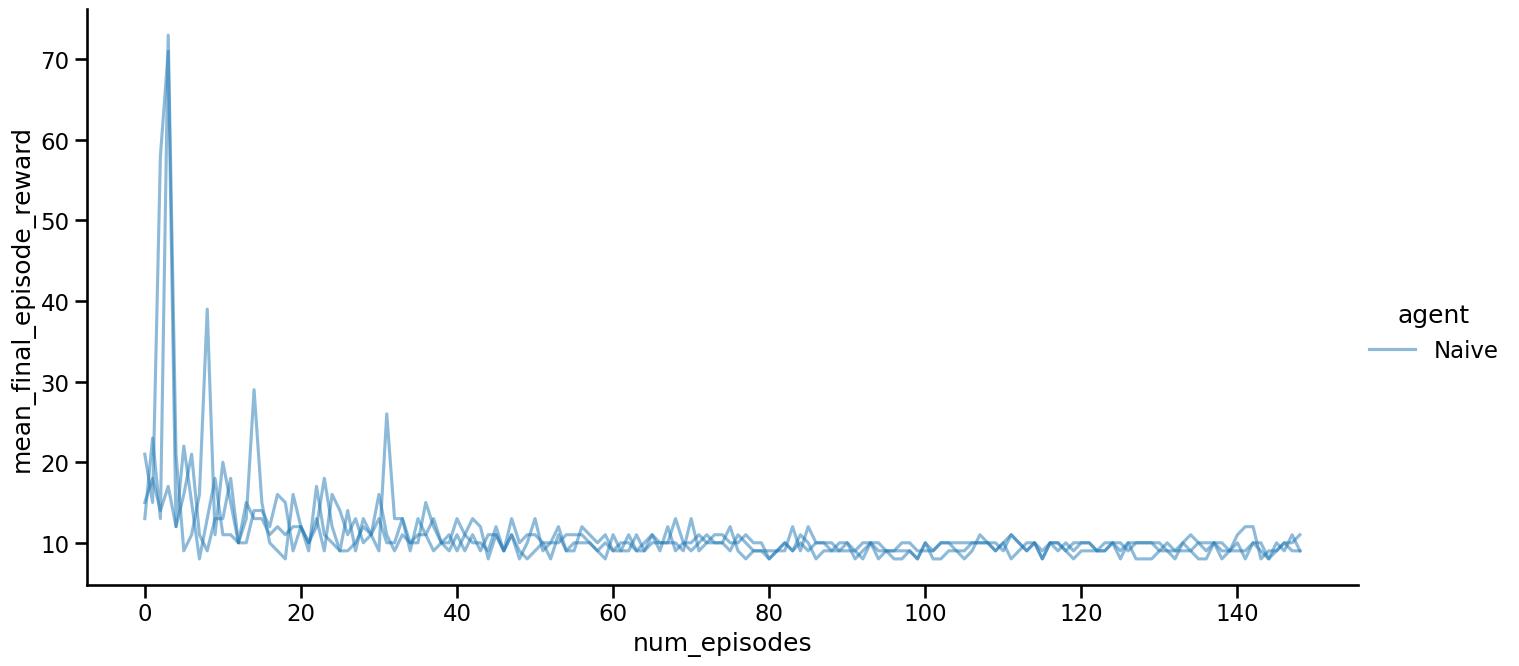

In [35]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=naive_trains_result_df,
                height=7, aspect=2, alpha=0.5);

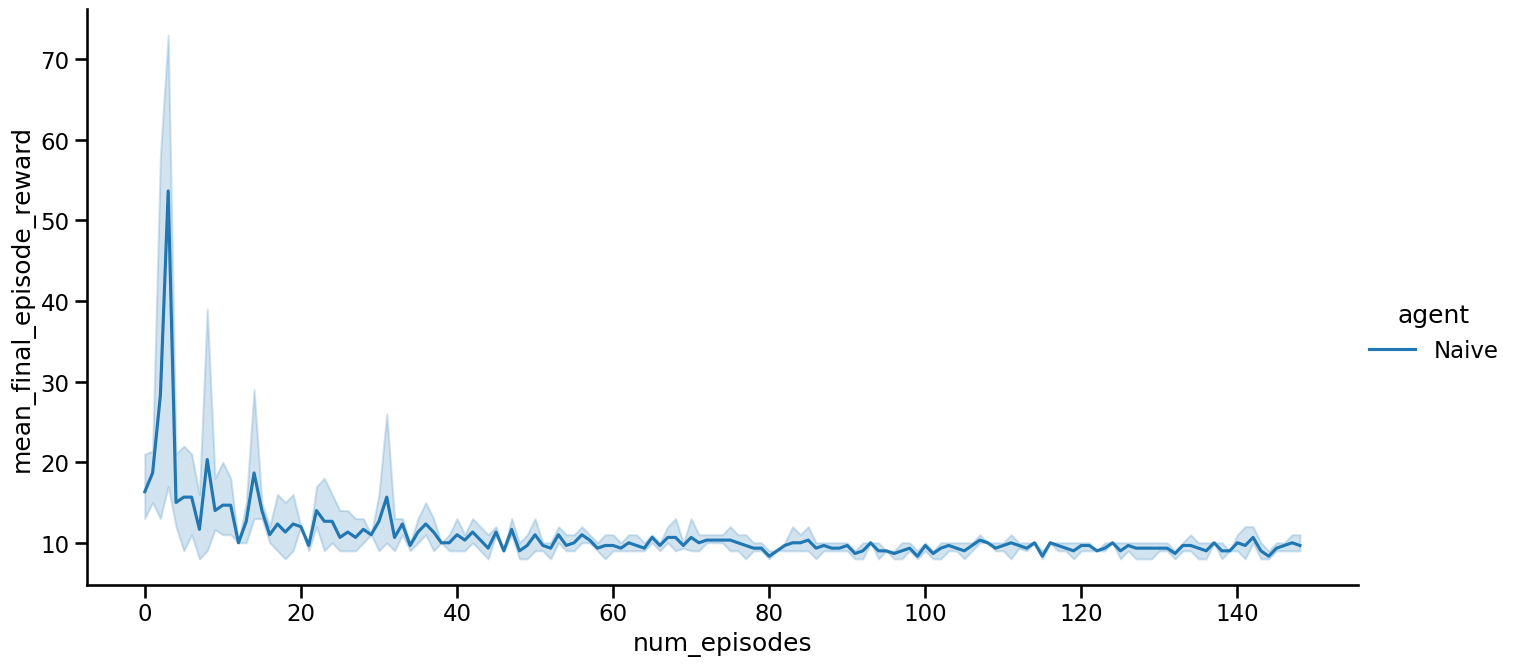

In [36]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", hue="agent", kind="line", data=naive_trains_result_df, height=7, aspect=2)

#### Test it

Episode reward: 10.0
Episode reward: 9.0
Episode reward: 10.0
Episode reward: 8.0
Episode reward: 9.0


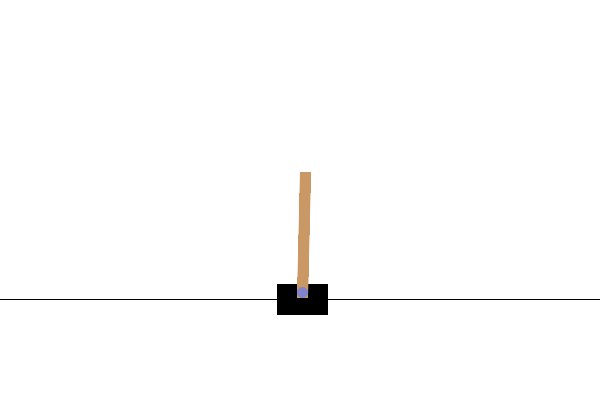

In [37]:
# q_network = torch.load("naive_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=5)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dqn_naive_tained")

#### Why It Doesn't Work: The Complexity of Deep Reinforcement Learning

Our initial deep value-based agent did not converge, primarily due to the three fundamental challenges of value-based deep reinforcement learning:

1. **Coverage**: Convergence to the optimal Q-function relies on comprehensive coverage of the state space. However, in the context of deep RL, the state space is often too large to be fully covered. In situations where not all states are sampled due to their vast number, the guarantee of convergence no longer holds.

2. **Correlation**: The probability of transitioning to the next state is highly influenced by the current state. This strong correlation can lead to local overfitting and the risk of becoming trapped in a local optimum: the neural network, which approximates the Q-function, may become overly specialized in a small portion of the action-state space and neglect the rest.

3. **Convergence**: The "targets" used as the truth to be achieved "move" during the learning process. For the same prediction (estimation of the value of a state-action pair, i.e., its Q-value), the loss of a given example changes during the learning process (due to *bootstrapping* a main concept of TD-Learning). In other words, DQN tries to minimize a moving target, a target that depends on the model we are learning and optimizing. This can lead to instability and make it difficult for the learning process to converge to an optimal policy.

In the following sections, we will explore strategies to address these challenges and improve the performance of our deep reinforcement learning agent.

### Exercise 3: Implement Deep Q-Networks v1 (DQN version 2013 with experience replay)

In 2013, DeepMind made a significant contribution to the field of reinforcement learning with the publication of the paper "Playing Atari with Deep Reinforcement Learning" by Volodymyr Mnih and al (https://arxiv.org/abs/1312.5602). This paper marked the introduction of the first version of Deep Q-Networks (DQN).

The paper's primary innovation was the development of a technique to decorrelate states in reinforcement learning. This technique, known as *experience replay*, leverages a *replay buffer* to store and sample experiences. The introduction of experience replay greatly enhanced the stability and efficiency of the learning process.

#### Experience replay

Experience replay is a key technique used in Deep Q-Networks (DQN) to address the issues of correlation.

In a typical reinforcement learning setup, an agent learns by interacting with the environment, receiving feedback in the form of rewards, and updating its policy based on this feedback. This process is inherently sequential and the successive states are highly correlated, which can lead to overfitting and instability in learning.

Experience replay addresses these issues by storing the agent's experiences, i.e., the tuples of (state, action, reward, next state), in a data structure known as a replay buffer. During the learning process, instead of learning from the most recent experience, the agent randomly samples a batch of experiences from the replay buffer. This random sampling breaks the correlation between successive experiences, leading to more stable and robust learning.

Also, by learning from past experiences, the agent can effectively learn from a fixed target, which mitigates the issue of learning from a moving target. This is because the experiences in the replay buffer remain fixed once they are stored, even though the agent's policy continues to evolve.

#### DQN v2013 Algorithm

Note: main differences with the previous algorithm are highlighted in red.

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $\color{red}{M}$<br>
	$\quad\quad$ batch size $\color{red}{m}$<br><br>

<b>Initialize</b> replay memory $\color{red}{\mathcal{D}}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}})$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ $\color{red}{\text{Store transition } (\mathbf{s}, \mathbf{a}, r, \mathbf{s'}) \text{ in } \mathcal{D}}$<br>
		$\quad\quad$ $\color{red}{\text{IF } \mathcal{D} \text{ contains "enough" transitions}}$<br>
			$\quad\quad\quad$ $\color{red}{\text{Sample random batch of transitions } (\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j) \text{ from } \mathcal{D} \text{ with } j=1 \text{ to } m}$<br>
			$\quad\quad\quad$ $\color{red}{\text{For each } j}$, set $y_j \leftarrow
			\begin{cases}
			r_j & \text{for terminal } \mathbf{s'}_j\\
			r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
			\end{cases}$<br>
			$\quad\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>


#### Implement the Replay Buffer

To incorporate experience replay into the provided naive deep value-based reinforcement learning agent definition, we need to introduce a memory buffer where experiences are stored, and then update the algorithm to sample a random batch of experiences from this buffer to update the weights.

In [23]:
class ReplayBuffer:
    """
    A Replay Buffer.

    Attributes
    ----------
    buffer : collections.deque
        A double-ended queue where the transitions are stored.

    Methods
    -------
    add(state: np.ndarray, action: np.int64, reward: float, next_state: np.ndarray, done: bool)
        Add a new transition to the buffer.
    sample(batch_size: int) -> Tuple[np.ndarray, float, float, np.ndarray, bool]
        Sample a batch of transitions from the buffer.
    __len__()
        Return the current size of the buffer.
    """

    def __init__(self, capacity: int):
        """
        Initializes a ReplayBuffer instance.

        Parameters
        ----------
        capacity : int
            The maximum number of transitions that can be stored in the buffer.
        """
        self.buffer = collections.deque(maxlen=capacity)

    def add(self, state: np.ndarray, action: np.int64, reward: float, next_state: np.ndarray, done: bool):
        """
        Add a new transition to the buffer.

        Parameters
        ----------
        state : np.ndarray
            The state vector of the added transition.
        action : np.int64
            The action of the added transition.
        reward : float
            The reward of the added transition.
        next_state : np.ndarray
            The next state vector of the added transition.
        done : bool
            The final state of the added transition.
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size: int) -> Tuple[np.ndarray, float, float, np.ndarray, bool]:
        """
        Sample a batch of transitions from the buffer.

        Parameters
        ----------
        batch_size : int
            The number of transitions to sample.

        Returns
        -------
        Tuple[np.ndarray, float, float, np.ndarray, bool]
            A batch of `batch_size` transitions.
        """
        # Here, `random.sample(self.buffer, batch_size)`
        # returns a list of tuples `(state, action, reward, next_state, done)`
        # where:
        # - `state`  and `next_state` are numpy arrays
        # - `action` and `reward` are floats
        # - `done` is a boolean
        #
        # `states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))`
        # generates 5 tuples `state`, `action`, `reward`, `next_state` and `done`, each having `batch_size` elements.
        states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))
        return np.array(states), actions, rewards, np.array(next_states), dones

    def __len__(self):
        """
        Return the current size of the buffer.

        Returns
        -------
        int
            The current size of the buffer.
        """
        return len(self.buffer)

#### Implement the training function

The training function of our initial deep value-based agent needs to be modified to incorporate the use of the replay buffer effectively.

1. **Store Experiences**: After the agent takes an action and receives a reward and the next state from the environment, store this experience in the replay buffer.

2. **Sample Experiences**: Instead of using the most recent experience to update the agent's policy, randomly sample a batch of experiences from the replay buffer.

3. **Compute Loss and Update Weights**: Use the sampled experiences to compute the loss and update the weights of the Q-Network.

4. **Handle Terminal States**: If the 'done' flag of an experience is True, indicating a terminal state, make sure to adjust the target Q-value to be just the received reward. This is because there are no future rewards possible after a terminal state.

##### Parctical tips

A key practical difference from the previous exercise is that we now train the Q-network on a (mini)batch of transitions rather than a single transition.  

To extract $\hat{Q}_{\mathbf{\omega}}(\mathbf{s}_j)_{\mathbf{a}_j}$ from the `q_network` output, it is essential to understand the following PyTorch concept:  

- **[torch.gather](https://pytorch.org/docs/stable/generated/torch.gather.html) (or [torch.Tensor.gather](https://pytorch.org/docs/stable/generated/torch.Tensor.gather.html))**: This function retrieves values along a specified axis using an index tensor, making it particularly useful for selecting Q-values corresponding to chosen actions.

**Task 3.1:** complete the `train_dqn1_agent` to use the replay buffer.

In [38]:
def train_dqn1_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # next_state_q_values, best_action_index = TODO... # Compute the maximum Q-values for the next states
                    next_state_q_values, best_action_index = torch.max(q_network(batch_next_states_tensor), dim=1)

                    # targets = TODO... # Compute the target Q-values for the batch
                    targets = batch_rewards_tensor + gamma * next_state_q_values * (1 - batch_dones_tensor)

                # current_q_values = TODO... # Compute the Q-values for the current states
                current_q_values = q_network(batch_states_tensor)

                # Select the Q-values corresponding to the chosen actions
                current_q_values = torch.gather(current_q_values, dim=1, index=batch_actions_tensor.unsqueeze(1)).squeeze(1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train it

In [39]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercise
dqn1_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dqn1_agent(env,
                                           q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer)
    dqn1_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn1_trains_result_list[1].extend(episode_reward_list)
    dqn1_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn1_trains_result_df = pd.DataFrame(np.array(dqn1_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn1_trains_result_df["agent"] = "DQN 2013"

# Save the action-value estimation function

torch.save(q_network, MODELS_DIR / "lab1_dqn1_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

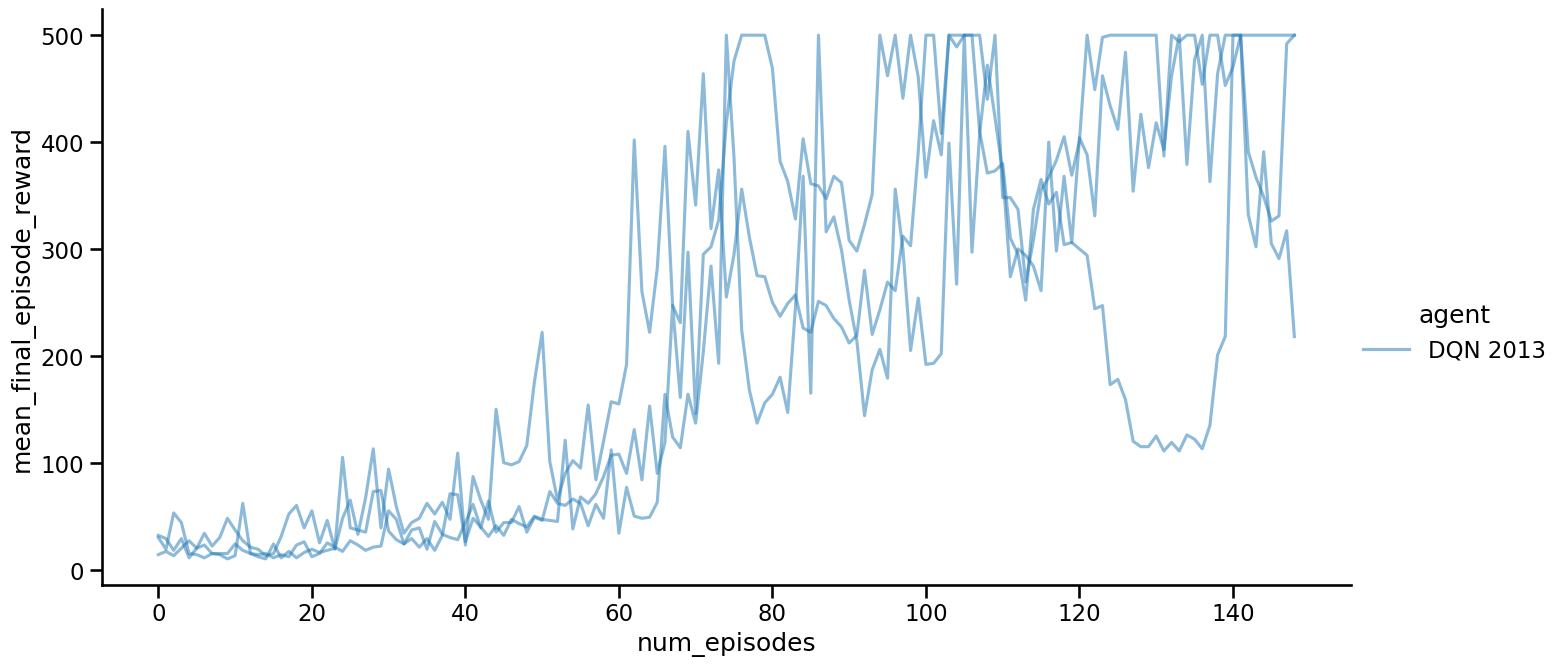

In [40]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn1_trains_result_df,
                height=7, aspect=2, alpha=0.5);

In [ ]:
#g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn1_trains_result_df, height=7, aspect=2)

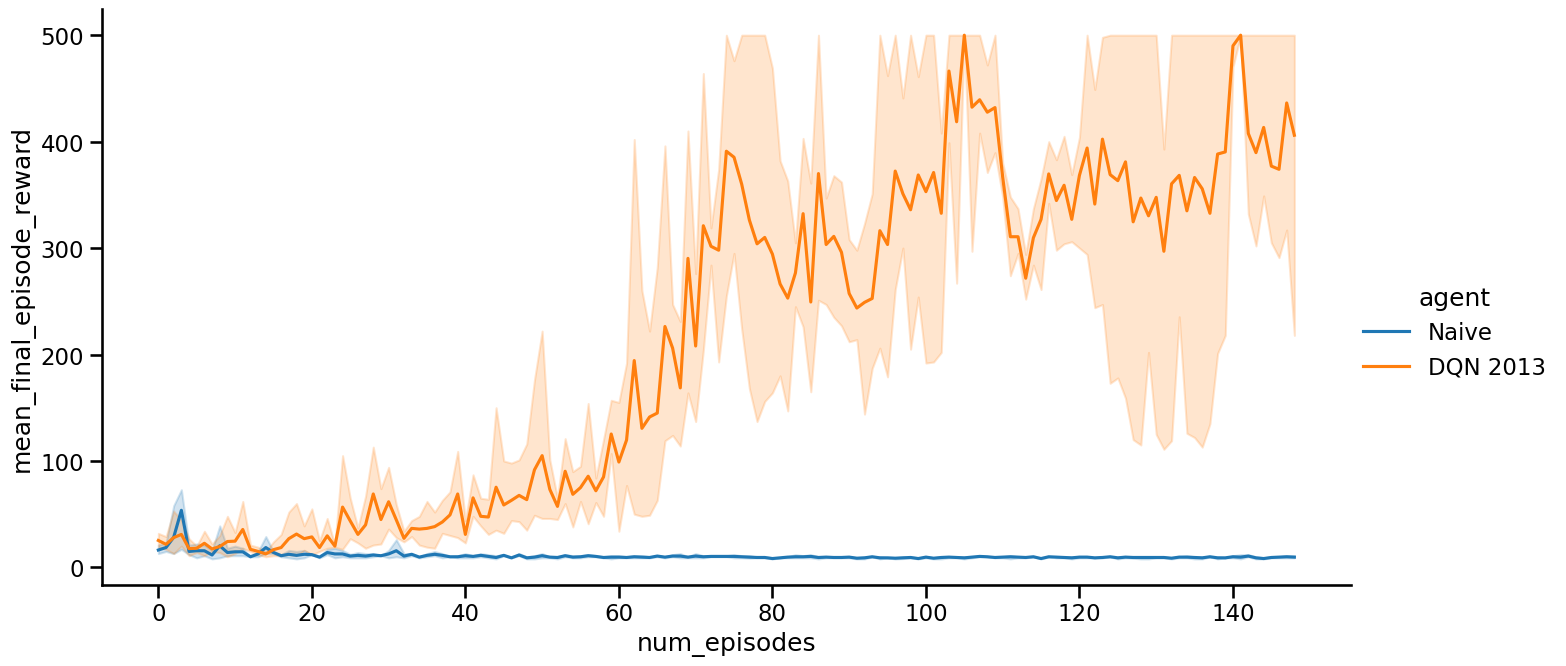

In [41]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df])
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

#### Test it

Episode reward: 500.0
Episode reward: 500.0
Episode reward: 500.0


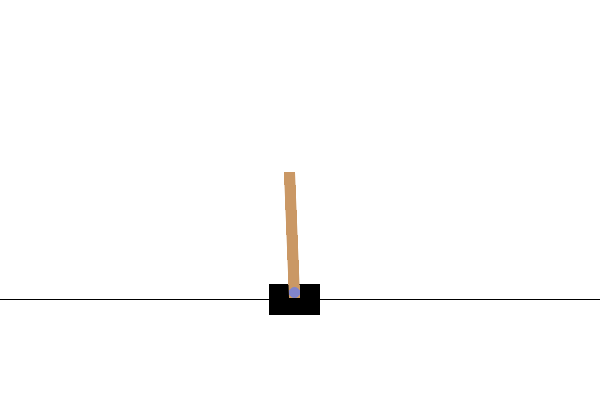

In [42]:
# q_network = torch.load("dqn1_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dqn1_tained")

#### Score

In [43]:
score_ex3 = dqn1_trains_result_df[["num_episodes", "mean_final_episode_reward"]].groupby("num_episodes").mean().max()
score_ex3

,0
mean_final_episode_reward,500.0


### Exercise 4: Implement Deep Q-Networks v2 (DQN version 2015) with *infrequent weight updates*

In 2015, DeepMind further advanced the field of reinforcement learning with the publication of the paper "Human-level control through deep reinforcement learning" by Volodymyr Mnih and colleagues (https://www.nature.com/articles/nature14236). This work introduced the second version of Deep Q-Networks (DQN).

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/assets/lab1_dqn_nature_journal.jpg?raw=true" width="200px" />

The key contribution of this paper was the introduction of a method to stabilize the learning process by infrequently updating the target weights. This technique, known as *infrequent updates of target weights*, significantly improved the stability of the learning process.

#### Infrequent weight updates

Infrequent weight updates, also known as the use of a target network, is a technique used in Deep Q-Networks (DQN) to address the issue of learning from a moving target.

In a typical DQN setup, there are two neural networks: the Q-network and the target network. The Q-network is used to predict the Q-values and is updated at every time step. The target network is used to compute the target Q-values for the update, and its weights are updated less frequently, typically every few thousand steps, by copying the weights from the Q-network.

The idea behind infrequent weight updates is to stabilize the learning process by keeping the target Q-values fixed for a number of steps. This mitigates the issue of learning from a moving target, as the target Q-values remain fixed between updates.

Without infrequent weight updates, both the predicted and target Q-values would change at every step, which could lead to oscillations and divergence in the learning process. By introducing a delay between updates of the target Q-values, the risk of such oscillations is reduced.

#### DQN v2015 Algorithm

Note: main differences with the previous algorithm are highlighted in red.

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $M$<br>
	$\quad\quad$ batch size $m$<br>
	$\quad\quad$ target network update frequency $\color{red}{\tau}$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}_{\mathbf{\omega_1}}$ with random weights $\mathbf{\omega_1}$<br>
<b>Initialize</b> target action-value function $\hat{Q}_{\mathbf{\omega_2}}$ with weights $\color{red}{\mathbf{\omega_2} = \mathbf{\omega_1}}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}})$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
		$\quad\quad$ If $\mathcal{D}$ contains "enough" transitions<br>
			$\quad\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$ with $j=1$ to $m$<br>
			$\quad\quad\quad$ For each $j$, set $y_j =
			\begin{cases}
			r_j & \text{for terminal } \mathbf{s'}_j\\
			r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega_{\color{red}{2}}}} (\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
			\end{cases}$<br>
			$\quad\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
			$\quad\quad\quad$ Every $\color{red}{\tau}$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\color{red}{\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega_1}$ <br>


#### Implement the training function

To incorporate the use of infrequent weight updates in the training function, you would need to make the following modifications:

1. **Update the Target Network Infrequently**: Instead of updating the weights of the target network at every time step, update them less frequently, for example, every few thousand steps. The weights of the target network are updated by copying the weights from the Q-network.

2. **Compute Target Q-values with the Target Network**: When computing the target Q-values for the update, use the target network instead of the Q-network. This ensures that the target Q-values remain fixed between updates, which stabilizes the learning process.

##### Parctical tips

To complete this exercise, you need to be familiar with the following PyTorch concepts.

**Copying the weights and biases from one neural network to another**

To transfer the parameters from `model1` to `model2`, use the following command:

```python
model2.load_state_dict(model1.state_dict())
```

**Task 4.1:** complete the `train_dqn2_agent` to apply infrequent weight updates.

In [27]:
def train_dqn2_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     target_q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer,
                     target_q_network_sync_period: int) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # next_state_q_values, best_action_index = TODO...
                    next_state_q_values, best_action_index = torch.max(target_q_network(batch_next_states_tensor), dim=1)

                    # targets = TODO...
                    targets = batch_rewards_tensor + gamma * next_state_q_values * (1 - batch_dones_tensor)

                # current_q_values = TODO...
                current_q_values = q_network(batch_states_tensor)
                current_q_values = torch.gather(current_q_values, dim=1, index=batch_actions_tensor.unsqueeze(1)).squeeze(1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            # Update the target q-network

            # TODO:...  # Every episodes (e.g., every `target_q_network_sync_period` episodes), the weights of the target network are updated with the weights of the Q-network
            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train it

In order to test this new implementation, we needs de adapt the following cell to instantiate and initialize the two neural networks.

**Task 4.2:** complete the following cell to make the two Q-Networks. Initialize a target network that has the same architecture as the Q-network. The weights of the target network are initially copied from the Q-network.

In [29]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = 3
dqn2_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # Instantiate required objects

    # q_network = TODO...
    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)

    # target_q_network = TODO... # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)

    # TODO... # Initialize the target Q-network with the same weights as the Q-network (c.f. the "Practical tips" section of the exercise)
    target_q_network.load_state_dict(q_network.state_dict())

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dqn2_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30)
    dqn2_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn2_trains_result_list[1].extend(episode_reward_list)
    dqn2_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn2_trains_result_df = pd.DataFrame(np.array(dqn2_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn2_trains_result_df["agent"] = "DQN 2015"

# Save the action-value estimation function

torch.save(q_network, MODELS_DIR / "lab1_dqn2_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

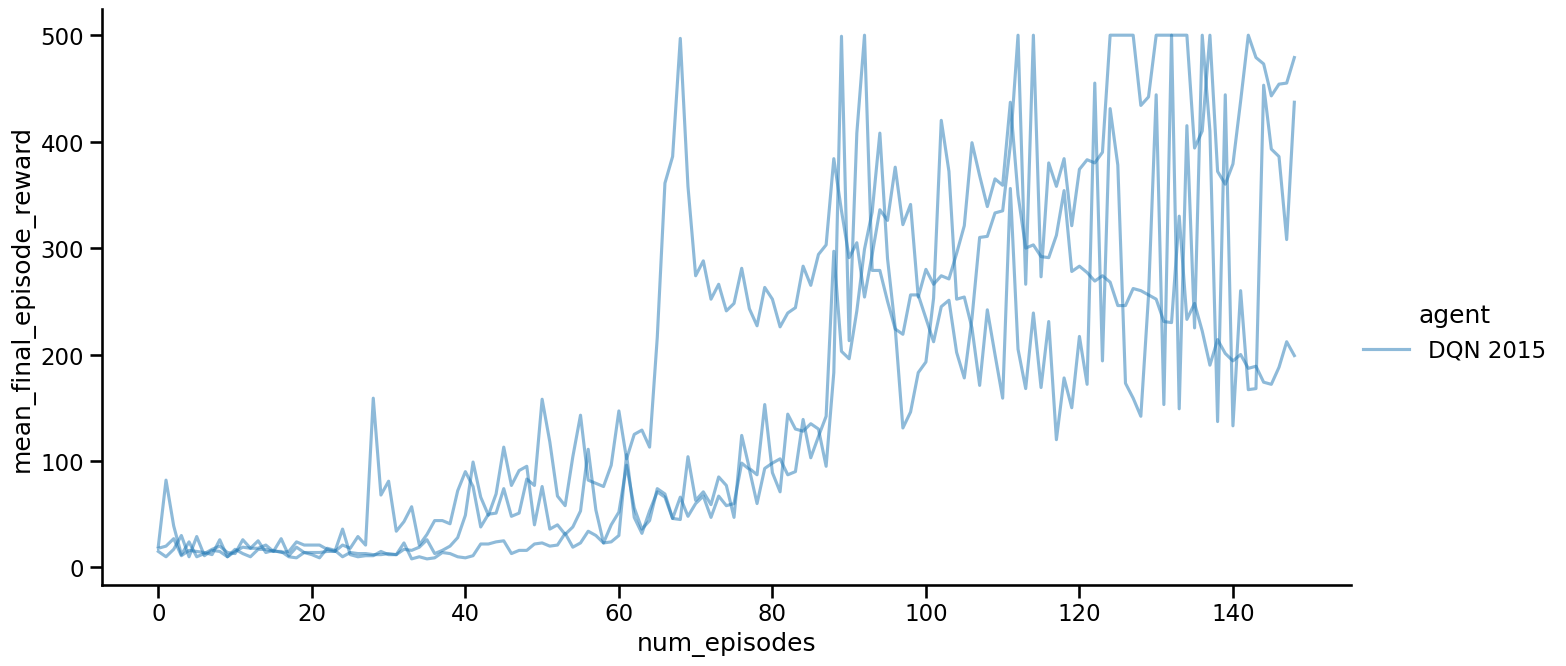

In [30]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn2_trains_result_df,
                height=7, aspect=2, alpha=0.5);

In [ ]:
#g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn2_trains_result_df, height=7, aspect=2)

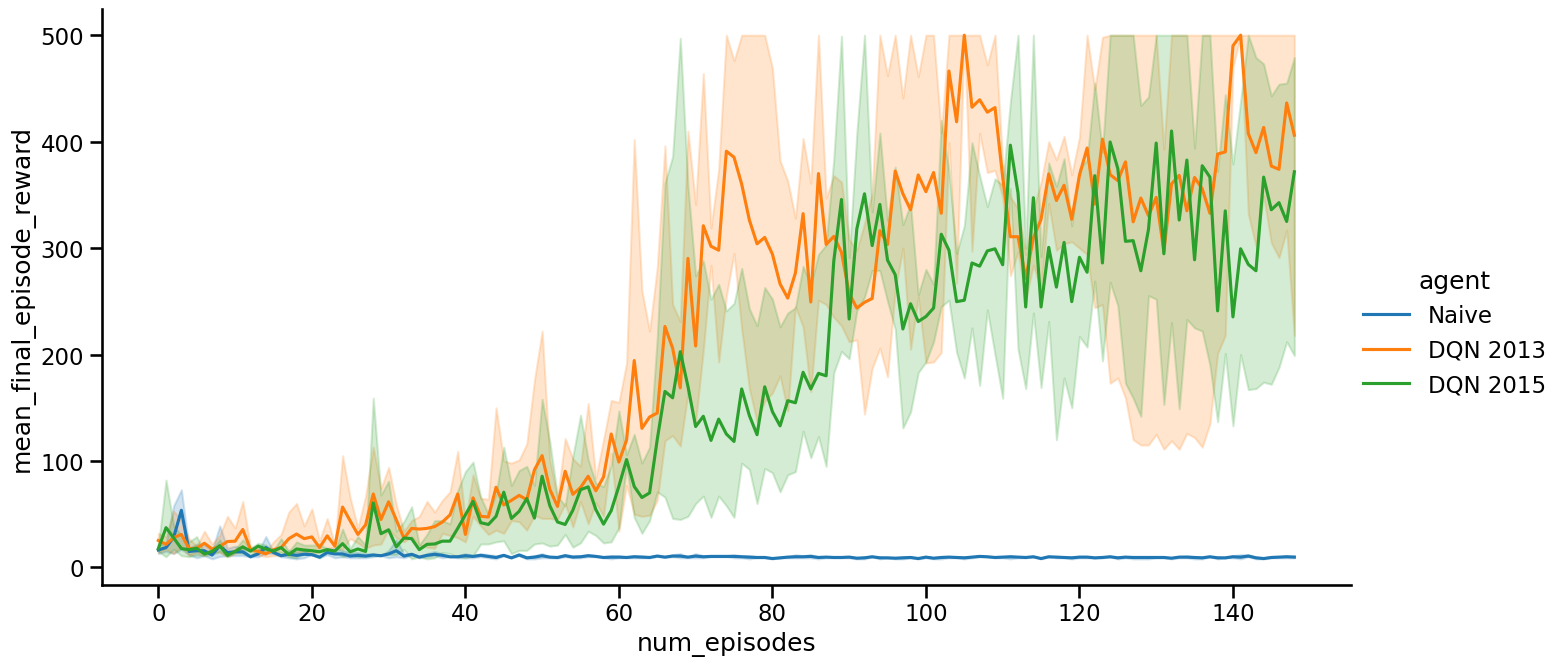

In [44]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df])
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

#### Test it

Episode reward: 500.0
Episode reward: 500.0
Episode reward: 500.0


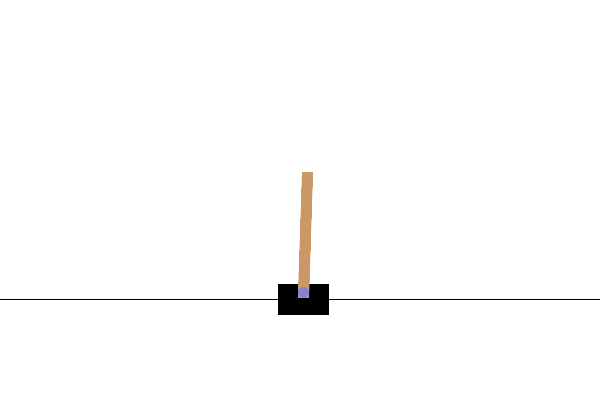

In [45]:
# q_network = torch.load("dqn2_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dqn2_tained")

#### Score

In [46]:
score_ex4 = dqn2_trains_result_df[["num_episodes", "mean_final_episode_reward"]].groupby("num_episodes").mean().max()
score_ex4

,0
mean_final_episode_reward,410.0


## Part 3: Double Deep Q-Network (DDQN)

Hado Van Hasselt et al. introduced Double Deep Q-Networks in the publication "Deep reinforcement learning with Double Q-Learning" in 2016 (https://arxiv.org/abs/1509.06461).

Double Deep Q-Networks (DDQN) is an enhancement over the standard Deep Q-Network (DQN). It was designed to reduce the overestimation of action values that can occur in DQN. The fundamental concept behind DDQN is the separation of action selection from their evaluation to reduce the overestimation of action values in DQN.

### DDQN Algorithm

Note: main differences with the previous algorithm are highlighted in red.

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $M$<br>
	$\quad\quad$ batch size $m$<br>
	$\quad\quad$ target network update frequency $\tau$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega_1}$<br>
<b>Initialize</b> target action-value function $\hat{Q}$ with weights $\mathbf{\omega_2} = \mathbf{\omega_1}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}})$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
		$\quad\quad$ If $\mathcal{D}$ contains "enough" transitions<br>
			$\quad\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$ with $j=1$ to $m$<br>
			$\quad\quad\quad$ For each $j$, set $\color{red}{\mathbf{a}^{\star} \leftarrow \arg\max_{\mathbf{a}} \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s'}_j)_{\mathbf{a}}}$<br>
			$\quad\quad\quad$ For each $j$, set $y_j \leftarrow
			\begin{cases}
			r_j & \text{for terminal } \mathbf{s'}_j\\
			r_j + \gamma \hat{Q}_{\mathbf{\omega_2}} (\mathbf{s'}_j)_{\color{red}{\mathbf{a}^\star}} & \text{for non-terminal } \mathbf{s'}_j
			\end{cases}$<br>
			$\quad\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
			$\quad\quad\quad$ Every $\tau$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega_1}$ <br>

### Exercise 5: Implement DDQN

#### Implement the training function

Switching from a Deep Q-Network (DQN) to a Double Deep Q-Network (DDQN) involves a key modification in the way the Q-value update is performed during training.

In DQN, the Q-value update is done using the maximum Q-value for the next state from the target network. However, this can lead to an overestimation of Q-values because it always uses the maximum estimate.

DDQN addresses this by decoupling the selection of the action from the evaluation of that action. In DDQN, the Q-network is used to select what the next action is, and the target network is used to evaluate the Q-value of taking that action at the next state.

**Task 4.2:** complete the `train_ddqn_agent` function.

In [47]:
def train_ddqn_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     target_q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer,
                     target_q_network_sync_period: int) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # GET ACTION, NEXT_STATE AND REWARD ###########

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # UPDATE THE Q_NETWORK WEIGHTS WITH A BATCH OF EXPERIENCES FROM THE BUFFER

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # best_actions = TODO... # First, select the best action using the online network (q_network)
                    best_actions = torch.argmax(q_network(batch_next_states_tensor), dim=1)

                    # next_state_q_values = TODO... # Then, use the target network (target_q_network) to get the Q-value for these actions
                    next_state_q_values = torch.gather(target_q_network(batch_next_states_tensor), dim=1, index=best_actions.unsqueeze(-1)).squeeze(-1)

                    # targets = TODO... # The targets for the batch are the rewards plus the discounted maximum Q-values obtained from the next states.
                    targets = batch_rewards_tensor + gamma * next_state_q_values * (1 - batch_dones_tensor)


                # Compute the current Q values for the batch.
                #
                # The expression `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)` is used to select specific elements from the tensor of Q-values returned by the Q-network.
                #
                # Here's a breakdown of the following line of code:
                # - `q_network(batch_states_tensor)`:
                #   This is passing a batch of states through the Q-network.
                #   For each state, this outputs the Q-value for each possible action.
                #   Thus, `q_network(batch_states_tensor)` returns a tensor of shape (batch_size, action_dim).
                #
                # - `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1))`:
                #   This is selecting the Q-values corresponding to the actions that were actually taken.
                #   The `gather` function is used to select elements from a tensor using an index.
                #   In this case, the index is `batch_actions_tensor.unsqueeze(-1)`, which is a tensor of the actions that were taken.
                #   The `unsqueeze(-1)` function is used to add an extra dimension to the tensor, which is necessary for the `gather` function.
                #
                # - `squeeze(-1)`:
                #   This is removing the extra dimension that was added by `unsqueeze(-1)`.
                #   The `squeeze` function is used to remove dimensions of size 1 from a tensor.
                #
                # So, the entire expression is selecting the Q-values of the actions that were actually taken from the tensor of all Q-values,
                # and returning a tensor of these selected Q-values.
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            # UPDATE THE TARGET Q-NETWORK #################

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In [48]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercice
ddqn_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_ddqn_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30)
    ddqn_trains_result_list[0].extend(range(len(episode_reward_list)))
    ddqn_trains_result_list[1].extend(episode_reward_list)
    ddqn_trains_result_list[2].extend([train_index for _ in episode_reward_list])

ddqn_trains_result_df = pd.DataFrame(np.array(ddqn_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
ddqn_trains_result_df["agent"] = "DDQN"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, MODELS_DIR / "lab1_ddqn_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

### Plot results

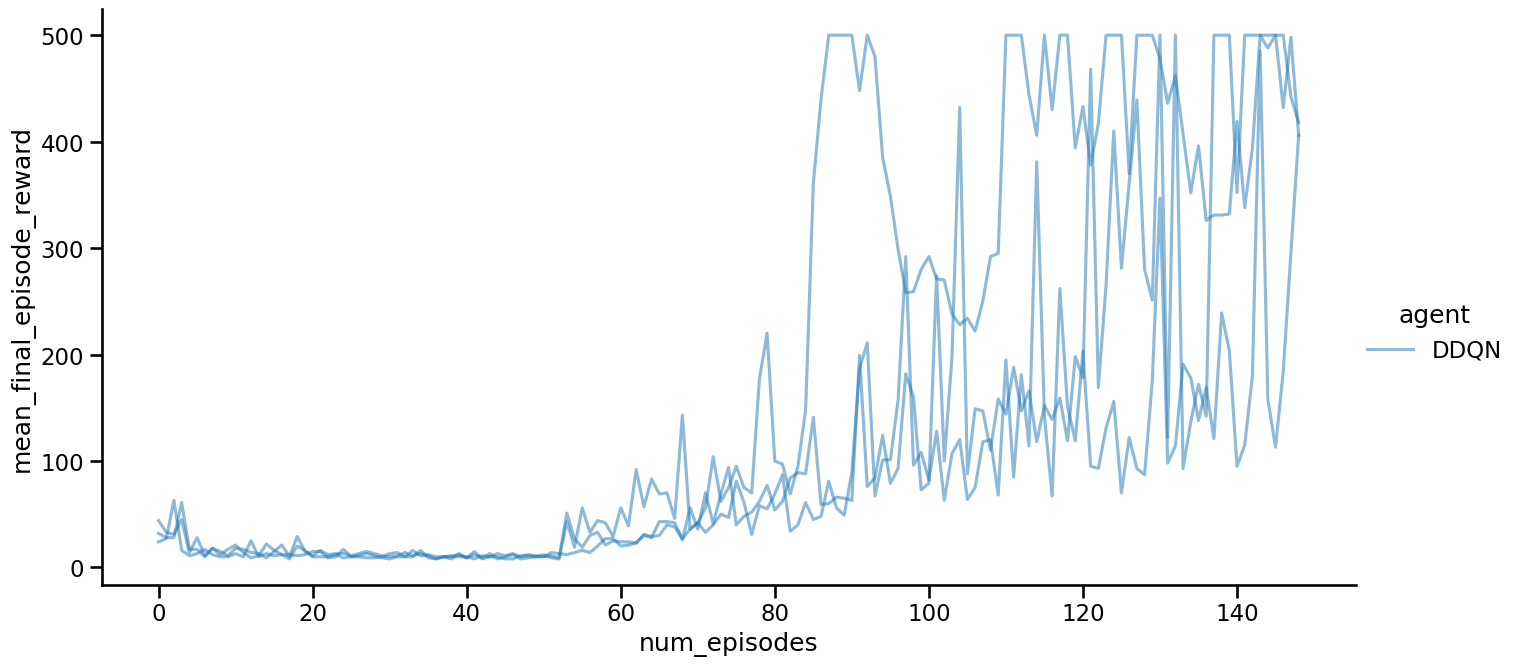

In [49]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=ddqn_trains_result_df,
                height=7, aspect=2, alpha=0.5);

In [ ]:
#g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=ddqn_trains_result_df, height=7, aspect=2)

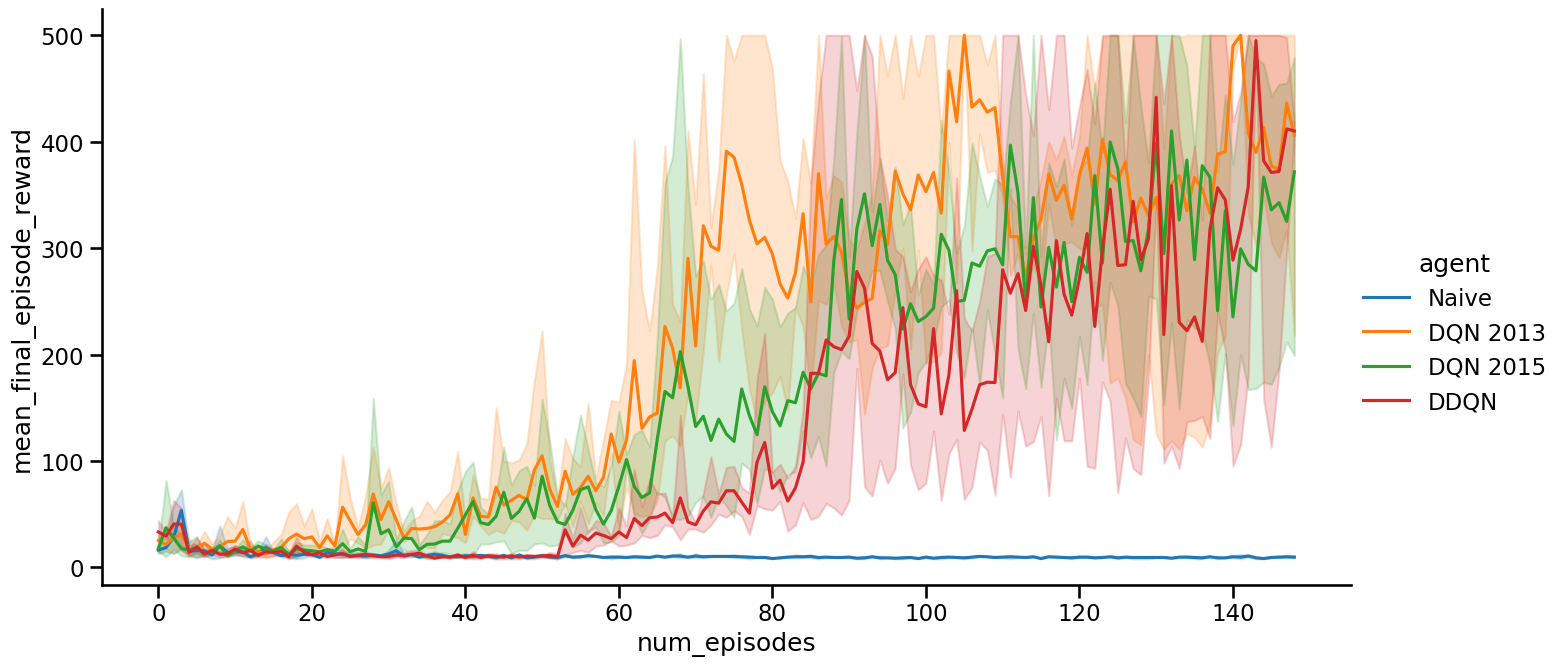

In [50]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df, ddqn_trains_result_df])
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

Episode reward: 448.0
Episode reward: 420.0
Episode reward: 466.0


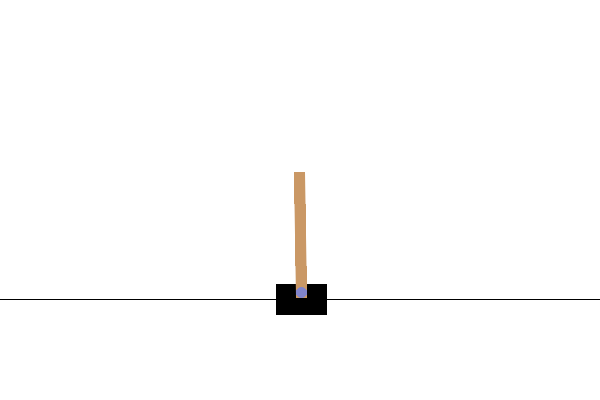

In [51]:
# q_network = torch.load("ddqn_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_ddqn_tained")

### Experimental results

**Task 5.2:** What do you observe? Why?

## Part 4: Prioritized Experience Replay (PEX or PER)

Prioritized Experience Replay (PER) is an enhancement to the traditional experience replay mechanism used in Deep Q-Networks (DQNs) and other reinforcement learning algorithms. In traditional experience replay, experiences (or transitions) are stored in a replay buffer, and mini-batches are sampled uniformly at random from this buffer to update the agent's Q-network. This means every experience has the same probability of being chosen, regardless of its significance to the learning process.

Prioritized Experience Replay (PER) is a technique that modifies the standard experience replay by more frequently replaying experiences that have a high expected learning progress, as measured by their temporal-difference (TD) error.

Prioritized Experience Replay was introduced by Tom Schaul et al. in the paper "Prioritised experience replay" in 2016 (https://arxiv.org/abs/1511.05952).

### DQN with PER algorithm

The DQN with Prioritized Experience Replay (PER) algorithm is detailed in page 5 of the paper "Prioritised experience replay" (https://arxiv.org/abs/1511.05952).

### Exercise 6: Implement DQN with PER

To switch from a DQN to a DQN with Prioritized Experience Replay (PER), you need to make a few modifications to the *DQN 2015* agent:

1. **Experience Replay Buffer**: Replace the standard experience replay buffer with a prioritized one. This buffer should store experiences with a priority value that is updated after each learning step. The priority value is usually the absolute TD error plus a small constant to avoid experiences having zero probability of being chosen.
2. **Sampling Method**: Change the sampling method from uniform to prioritized sampling. This means experiences with higher priority values have a higher probability of being chosen for learning.
3. **Loss Function**: Modify the loss function to include importance sampling weights. These weights compensate for the bias introduced by the non-uniform sampling. The weight of each sampled experience is the inverse of its probability of being chosen.



#### Implement the PrioritizedReplayBuffer

**Task 6.1:** implement the `PrioritizedReplayBuffer` class.

In [59]:
class PrioritizedReplayBuffer:
    """
    Implements a Prioritized Experience Replay buffer as described in the paper
    "Prioritized Experience Replay" (https://arxiv.org/abs/1511.05952).

    Attributes
    ----------
    buffer : Deque[Tuple[float, float, float, float, float]]
        The replay buffer storing the experiences.
    priorities : Deque[float]
        The priorities of the experiences in the buffer.
    """

    def __init__(self, capacity: int):
        """
        Initialize the replay buffer.

        Parameters
        ----------
        capacity : int
            The maximum number of experiences the buffer can hold.
        """
        self.buffer = collections.deque(maxlen=capacity)
        self.priorities = collections.deque(maxlen=capacity)

    def add(self, state: float, action: float, reward: float, next_state: float, done: float):
        """
        Add an experience to the buffer.

        Parameters
        ----------
        state : float
            The current state.
        action : float
            The action taken.
        reward : float
            The reward received.
        next_state : float
            The next state.
        done : float
            Whether the episode has ended.
        """
        self.buffer.append((state, action, reward, next_state, done))
        self.priorities.append(max(self.priorities, default=1))

    def sample(self, batch_size: int, alpha: float = 0.6, beta: float = 0.4) -> Tuple[List[Tuple[float, float, float, float, float]], np.ndarray, np.ndarray]:
        """
        Sample a batch of experiences from the buffer.

        Parameters
        ----------
        batch_size : int
            The number of experiences to sample.
        alpha : float, optional
            The exponent that determines how much prioritization is used.
        beta : float, optional
            The exponent that determines how much importance sampling is used.

        Returns
        -------
        Tuple[List[Tuple[float, float, float, float, float]], np.ndarray, np.ndarray]
            The sampled experiences, the indices of the sampled experiences, and the importance sampling weights.
        """

        # priorities = TODO... # Calculate priorities
        priorities = np.array(self.priorities)
        probabilities = priorities ** alpha
        probabilities /= probabilities.sum()

        # indices = TODO...
        indices = np.random.choice(len(self.buffer), size=batch_size, p=probabilities)
        # experiences = TODO... # Sample experiences
        experiences = [self.buffer[i] for i in indices]

        # weights = TODO... # Calculate weights
        weights = (len(self.buffer) * probabilities[indices]) ** (-beta)
        weights /= weights.max()

        return experiences, indices, weights

    def update_priorities(self, indices: np.ndarray, errors: List[float], offset: float = 0.1):
        """
        Update the priorities of the sampled experiences.

        Parameters
        ----------
        indices : np.ndarray
            The indices of the sampled experiences.
        errors : List[float]
            The new TD errors for the sampled experiences.
        offset : float, optional
            A small constant to ensure the priorities are strictly positive.
        """
        print(indices, errors)
        for i, error in zip(indices, errors):
            self.priorities[i] = error + offset

    def __len__(self) -> int:
        """
        Return the current size of the buffer.

        Returns
        -------
        int
            The current size of the buffer.
        """
        return len(self.buffer)

#### Implement the training function

**Task 6.2:** complete the `train_dqn_per_agent` function.

In [57]:
def train_dqn_per_agent(env: gym.Env,
                        q_network: torch.nn.Module,
                        target_q_network: torch.nn.Module,
                        optimizer: torch.optim.Optimizer,
                        loss_fn: Callable,
                        epsilon_greedy: EpsilonGreedy,
                        device: torch.device,
                        lr_scheduler: _LRScheduler,
                        num_episodes: int,
                        gamma: float,
                        batch_size: int,
                        replay_buffer: PrioritizedReplayBuffer,  # Use a Prioritized Replay Buffer
                        target_q_network_sync_period: int,
                        alpha: float = 0.6,  # Alpha parameter for PER
                        beta: float = 0.4):  # Beta parameter for PER
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : PrioritizedReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.
    alpha : float
        The exponent that determines how much prioritization is used when sampling from the replay buffer.
    beta : float
        The exponent that determines how much importance sampling is used to adjust the loss function.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # GET ACTION, NEXT_STATE AND REWARD ###########

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # UPDATE THE Q_NETWORK WEIGHTS WITH A BATCH OF EXPERIENCES FROM THE BUFFER

            if len(replay_buffer) > batch_size:
                # Sample experiences and importance-sampling weights from the buffer

                # experiences, indices, weights = TODO...
                experiences, indices, weights = replay_buffer.sample(batch_size, alpha, beta)
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*experiences)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)
                weights_tensor = torch.tensor(weights, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # Here's a breakdown of the next line of code:
                    # - `q_network(batch_next_states_t)`:
                    #   This is passing a batch of "next states" through the Q-network.
                    #   This outputs the Q-value for each possible action, a tensor of shape (batch_size, action_dim).
                    #
                    #  - `.max(dim=1)`:
                    #   This is finding the maximum Q-value for each state in the batch.
                    #   The dim=1 argument specifies that the maximum should be taken over the action dimension.
                    #
                    # The max() function in PyTorch returns a tuple containing two tensors: the maximum values and the indices where these maximum values were found.
                    # In the next lines of code, we will just use the first tensor (the maximum values) and ignoring the second tensor (the indices).
                    next_state_q_values, best_action_index = target_q_network(batch_next_states_tensor).max(dim=1)

                    # The targets for the batch are the rewards plus the discounted maximum Q-values obtained from the next states.
                    # The expression `(1 - batch_dones_tensor)` is used to handle the end of episodes.
                    # The `batch_dones_tensor` indicates whether each state in the batch is a terminal state (i.e., the end of an episode).
                    # If a state is a terminal state, the corresponding value in `batch_dones_tensor` is 1, otherwise it's 0.
                    # The Q-value of a terminal state is defined to be 0. Therefore, when calculating the target Q-values,
                    # we don't want to include the Q-value of the next state if the current state is a terminal state.
                    # This is achieved by multiplying `next_state_q_values` by `(1 - batch_dones_tensor)`.
                    # If the state is a terminal state, this expression becomes 0 and the Q-value of the next state is effectively ignored.
                    # If the state is not a terminal state, this expression is 1 and the Q-value of the next state is included in the calculation.
                    targets = batch_rewards_tensor + gamma * next_state_q_values * (1 - batch_dones_tensor)

                # Compute the current Q values for the batch.
                #
                # The expression `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)` is used to select specific elements from the tensor of Q-values returned by the Q-network.
                #
                # Here's a breakdown of the following line of code:
                # - `q_network(batch_states_tensor)`:
                #   This is passing a batch of states through the Q-network.
                #   For each state, this outputs the Q-value for each possible action.
                #   Thus, `q_network(batch_states_tensor)` returns a tensor of shape (batch_size, action_dim).
                #
                # - `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1))`:
                #   This is selecting the Q-values corresponding to the actions that were actually taken.
                #   The `gather` function is used to select elements from a tensor using an index.
                #   In this case, the index is `batch_actions_tensor.unsqueeze(-1)`, which is a tensor of the actions that were taken.
                #   The `unsqueeze(-1)` function is used to add an extra dimension to the tensor, which is necessary for the `gather` function.
                #
                # - `squeeze(-1)`:
                #   This is removing the extra dimension that was added by `unsqueeze(-1)`.
                #   The `squeeze` function is used to remove dimensions of size 1 from a tensor.
                #
                # So, the entire expression is selecting the Q-values of the actions that were actually taken from the tensor of all Q-values,
                # and returning a tensor of these selected Q-values.
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss with importance-sampling weights

                # loss = TODO...
                loss = (weights_tensor * loss_fn(current_q_values, targets)).mean()

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

                # Update priorities in the buffer

                with torch.no_grad():
                    # new_td_errors = TODO...
                    new_td_errors = loss_fn(current_q_values, targets).detach().cpu().numpy()
                replay_buffer.update_priorities(indices, new_td_errors)

            # UPDATE THE TARGET Q-NETWORK #################

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In [58]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercice
dqn_per_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # INSTANTIATE REQUIRED OBJECTS

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = PrioritizedReplayBuffer(2000)

    # TRAIN THE Q-NETWORK

    episode_reward_list = train_dqn_per_agent(env,
                                              q_network,
                                              target_q_network,
                                              optimizer,
                                              loss_fn,
                                              epsilon_greedy,
                                              device,
                                              lr_scheduler,
                                              num_episodes=150,
                                              gamma=0.9,
                                              batch_size=128,
                                              replay_buffer=replay_buffer,
                                              target_q_network_sync_period=30,
                                              alpha=0.6,
                                              beta=0.4)
    dqn_per_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn_per_trains_result_list[1].extend(episode_reward_list)
    dqn_per_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn_per_trains_result_df = pd.DataFrame(np.array(dqn_per_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn_per_trains_result_df["agent"] = "DQN 2015 + PER"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, MODELS_DIR / "lab1_dqn_per_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

[(array([ 0.06611659,  1.0009402 , -0.18772335, -1.8443462 ], dtype=float32), np.int64(1), 1.0, array([ 0.08613539,  1.1975712 , -0.22461028, -2.188978  ], dtype=float32), True), (array([-0.01280074, -0.16324367,  0.00684614,  0.13762182], dtype=float32), np.int64(0), 1.0, array([-0.01606561, -0.35846302,  0.00959858,  0.4324567 ], dtype=float32), False), (array([ 0.11878201,  1.1834819 , -0.04509315, -1.6838188 ], dtype=float32), np.int64(1), 1.0, array([ 0.14245164,  1.3790959 , -0.07876952, -1.9901944 ], dtype=float32), False), (array([ 0.00271508,  1.0079271 , -0.11323749, -1.6404372 ], dtype=float32), 1, 1.0, array([ 0.02287362,  1.2041792 , -0.14604622, -1.9661508 ], dtype=float32), False), (array([ 0.20153257,  1.7709422 , -0.1646974 , -2.632902  ], dtype=float32), np.int64(0), 1.0, array([ 0.23695141,  1.5774115 , -0.21735543, -2.3947365 ], dtype=float32), True), (array([-0.04301037,  0.02496903, -0.03313535, -0.00712731], dtype=float32), np.int64(0), 1.0, array([-0.04251099, -

TypeError: iteration over a 0-d array

### Plot results

In [ ]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn_per_trains_result_df,
                height=7, aspect=2, alpha=0.5);

In [ ]:
#g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn_per_trains_result_df, height=7, aspect=2)

In [ ]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df, ddqn_trains_result_df, dqn_per_trains_result_df])
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

In [ ]:
# q_network = torch.load("dqn_per_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dqn_per_tained")

### Experimental results

**Task 6.2:** What do you observe? Why?

## Part 5: Dueling Double DQN : DDQN with Advantage function


Dueling Double DQN (Dueling DDQN) is an enhancement over the standard DQN that aims to improve the quality of the learned value function (https://arxiv.org/abs/1511.06581). The motivation for Dueling DDQN lies in its architecture, which separately estimates two components: the value of being in a particular state (V(s)), and the advantage of taking a particular action in that state (A(s, a)).

In standard DQN, a single stream of network layers estimates the Q-value directly. In contrast, Dueling DDQN has two streams to separately estimate the value and advantage functions, which are then combined to calculate the Q-value. This allows the network to more effectively learn which states are (or are not) valuable without having to learn the effect of each action for each state. This is particularly useful in environments where the value of the state does not vary much across actions.

The separation of the estimation process helps in stabilizing learning and often leads to better policy evaluation, especially in cases where the action choice does not have a large impact on what happens next—making Dueling DDQN a more robust and often more efficient learning algorithm compared to the standard DQN.

Thus, the Dueling DQN architecture introduces two separate streams within the neural network:

   - **Value Stream (`V(s)`):** Estimates the overall value of being in a state, regardless of the action taken.
   - **Advantage Stream (`A(s, a)`):** Estimates the relative advantage of each action in a given state.

These two streams share some common layers at the beginning and then branch out. They are combined at the end to produce the Q-values using the following formula:

$$Q(s, a) = V(s) + \left( A(s, a) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a') \right)$$

where:
- $A(s, a)$ is the advantage of action $a$ in state $s$.
- $|\mathcal{A}|$ is the number of possible actions.

<img src="https://www.researchgate.net/publication/336715783/figure/fig2/AS:816675293253632@1571721971001/Double-Dueling-Deep-Q-Learning-Network-DDDQN.jpg"></img>

### Exercise 7: Implement DDDQN

Modify the above `QNetwork` class to implement a **Dueling Double Deep Q-Network (DDDQN)** by completing the `__init__` and `forward` methods of the new class `DuelingQNetwork` partially implemented below.

### Definition of the Dueling DQN network

#### Implement the Q-Network

**Task 7.1:** complete the `DuelingDQN` class.

- **In the `__init__` Method:**
  - Initialize the shared layers (`layer1` and `layer2`) as in the original `QNetwork`.
  - Define two separate streams after the shared layers:
    - **Value Stream:**
      - A fully connected layer (`self.value_layer`) that outputs a single value.
    - **Advantage Stream:**
      - A fully connected layer (`self.advantage_layer`) that outputs a value for each possible action.

- **In the `forward` Method:**
  - Pass the input through the shared layers with activation functions.
  - Pass the output of the shared layers into both the value and advantage streams.
  - Combine the outputs of the value and advantage streams to compute the final Q-values using the formula provided.

In [ ]:
class DuelingQNetwork(torch.nn.Module):
    """
    A Dueling Q-Network implemented with PyTorch.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        First fully connected layer (common feature layer).
    layer2 : torch.nn.Linear
        Second fully connected layer (common feature layer).
    value_layer : torch.nn.Linear
        Linear layer for the value stream.
    advantage_layer : torch.nn.Linear
        Linear layer for the advantage stream.

    Methods
    -------
    forward(x: torch.Tensor) -> torch.Tensor
        Define the forward pass of the DuelingQNetwork.
    """

    def __init__(self, n_observations: int, n_actions: int, nn_l1: int, nn_l2: int):
        """
        Initialize a new instance of DuelingQNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        nn_l1 : int
            The number of neurons in the first hidden layer.
        nn_l2 : int
            The number of neurons in the second hidden layer.
        """
        super(DuelingQNetwork, self).__init__()

        # Common feature layers
        # self.layer1 = TODO...
        # self.layer2 = TODO...

        # Value stream
        # self.value_layer = TODO...

        # Advantage stream
        # self.advantage_layer = TODO...


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Define the forward pass of the DuelingQNetwork.

        Parameters
        ----------
        x : torch.Tensor
            The input tensor (state).

        Returns
        -------
        torch.Tensor
            The output tensor (Q-values).
        """

        # TODO...

        return q_values

#### Implement the training function

**Task 7.2:** complete the `train_dddqn_agent` function (you can simply copy / paste your response from `train_ddqn_agent`).

In [ ]:
def train_dddqn_agent(env: gym.Env,
                      q_network: torch.nn.Module,
                      target_q_network: torch.nn.Module,
                      optimizer: torch.optim.Optimizer,
                      loss_fn: Callable,
                      epsilon_greedy: EpsilonGreedy,
                      device: torch.device,
                      lr_scheduler: _LRScheduler,
                      num_episodes: int,
                      gamma: float,
                      batch_size: int,
                      replay_buffer: ReplayBuffer,
                      target_q_network_sync_period: int) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # GET ACTION, NEXT_STATE AND REWARD ###########

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # UPDATE THE Q_NETWORK WEIGHTS WITH A BATCH OF EXPERIENCES FROM THE BUFFER

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # best_actions = TODO... # First, select the best action using the online network (q_network)

                    # next_state_q_values = TODO... # Then, use the target network (target_q_network) to get the Q-value for these actions

                    # targets = TODO... # The targets for the batch are the rewards plus the discounted maximum Q-values obtained from the next states.


                # Compute the current Q values for the batch.
                #
                # The expression `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)` is used to select specific elements from the tensor of Q-values returned by the Q-network.
                #
                # Here's a breakdown of the following line of code:
                # - `q_network(batch_states_tensor)`:
                #   This is passing a batch of states through the Q-network.
                #   For each state, this outputs the Q-value for each possible action.
                #   Thus, `q_network(batch_states_tensor)` returns a tensor of shape (batch_size, action_dim).
                #
                # - `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1))`:
                #   This is selecting the Q-values corresponding to the actions that were actually taken.
                #   The `gather` function is used to select elements from a tensor using an index.
                #   In this case, the index is `batch_actions_tensor.unsqueeze(-1)`, which is a tensor of the actions that were taken.
                #   The `unsqueeze(-1)` function is used to add an extra dimension to the tensor, which is necessary for the `gather` function.
                #
                # - `squeeze(-1)`:
                #   This is removing the extra dimension that was added by `unsqueeze(-1)`.
                #   The `squeeze` function is used to remove dimensions of size 1 from a tensor.
                #
                # So, the entire expression is selecting the Q-values of the actions that were actually taken from the tensor of all Q-values,
                # and returning a tensor of these selected Q-values.
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            # UPDATE THE TARGET Q-NETWORK #################

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In [ ]:
env = gym.make('CartPole-v1')

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercice
dddqn_trains_result_list = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):

    # Instantiate required objects

    q_network = DuelingQNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = DuelingQNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dddqn_agent(env,
                                            q_network,
                                            target_q_network,
                                            optimizer,
                                            loss_fn,
                                            epsilon_greedy,
                                            device,
                                            lr_scheduler,
                                            num_episodes=150,
                                            gamma=0.9,
                                            batch_size=128,
                                            replay_buffer=replay_buffer,
                                            target_q_network_sync_period=30)
    dddqn_trains_result_list[0].extend(range(len(episode_reward_list)))
    dddqn_trains_result_list[1].extend(episode_reward_list)
    dddqn_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dddqn_trains_result_df = pd.DataFrame(np.array(dddqn_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dddqn_trains_result_df["agent"] = "DDDQN"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, MODELS_DIR / "lab1_dddqn_q_network.pth")

env.close()

### Plot results

In [ ]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dddqn_trains_result_df,
                height=7, aspect=2, alpha=0.5);

In [ ]:
#g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dddqn_trains_result_df, height=7, aspect=2)

In [ ]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df, ddqn_trains_result_df, dqn_per_trains_result_df, dddqn_trains_result_df])
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

In [ ]:
# q_network = torch.load("dddqn_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif(FIGS_DIR / "lab1_dddqn_tained")

## Bonus 2: Hyperparameters optimization with Optuna

Optuna is an open-source hyperparameter optimization framework designed to automate the process of searching for the best hyperparameters in machine learning models. It is highly efficient and flexible, supporting various optimization algorithms. Optuna works with Python-based machine learning libraries like PyTorch, TensorFlow, and Scikit-learn. Optuna’s core feature is its ability to perform dynamic search spaces and pruning, allowing faster convergence by terminating poorly performing trials early.
Optuna supports distributed optimization for large-scale tuning.

### Official documentation

- Optuna GitHub: [https://github.com/optuna/optuna](https://github.com/optuna/optuna)
- Optuna Documentation: [https://optuna.org](https://optuna.org)

### Example of usage with PyTorch

Here's an example of how to use Optuna to optimize the hyperparameters of a simple neural network with PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)

    model = Net(input_size=28*28, hidden_size=hidden_size, output_size=10)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    # Dummy dataset
    X = torch.randn(100, 28*28)
    y = torch.randint(0, 10, (100,))
    train_loader = DataLoader(TensorDataset(X, y), batch_size=32)

    # Training loop
    for epoch in range(10):
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()

    return loss.item()

# Optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Show best hyperparameters
print(study.best_trial)

This example creates a basic neural network and tunes the `hidden_size` and learning rate (`lr`) using Optuna.

## Further readings

### Rainbow paper: Putting everything together

In  2017, Henssel et al. performed a large experiment that combined several DQN enhancements, among them DDQN and PER (https://arxiv.org/abs/1710.02298). They found that the ehancements worked well together. The paper has become known as the Rainbow paper, since the major graph showing the cumulative performance over 57 Atrari games is multicolored.

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-53439-ep-2025-students/main/assets/lab1_rainbow_curve.png?raw=true" width="600px" />